# Clustering Algorithms
- unsupervised learning, to detect patterns, usefule when you don't know what you're looking for
- task of gathering samples into groups of similar samples accourding to some pre-defined similarity or dissimilarity measure
- grouping of data objects such that the objects within a group of similar (or related) to another and different from (or unrelated to) the objects in other groups
- ```outliers```
    - objects that do not belong to any of the cluster or form a cluster of very small cardinality
    - in some applicateions, we are interested in discovering outliers, not clusters (```outlier analysis```)

# Goal of clustering
- goal of clustering is to divide the data points into a number of groups so that the data points within each group are more comparable to one another  and different from the data points with the other groups
- given a set of data points, each described by a set of attributes, find clusters such that
    - inter-cluster similarity is F1 maximized
    - intra-cluster similarity is minimized
- requires the definition of a similarity measure

# Applications of Clustering
- Clustering is widely used technique in recommendation engines, banking, document Clustering and Image Segmentation
- Image Segmentation
    - use clustering to create clusters having similar pixels in the same group
    - Cluster images based on their visual content
- Web / Document Clustering
    - to cluster similar documents together
    - Grouping emails or search results
    - cluster web pages based on their content
    - Cluster groups of users based on their access patterns on web pages
- Customer/Market segmentation
    - group customers into different market segments based on customer shopping patterns
    - this strategy is used across functions including telecom, e-commerce, sports, advertising, sales, etc.
- Recommendation Engines
    - to cluster similar content including songs, movies, books, etc and then recommend the most similar content
- Social Network analysis
    - Facebook smartlists
- organizing computer clusters
    - organizing computer clusters and data centers for network layout and location
- Astronomical data analysis
    - understanding galaxy information
- Bioinformatics
    - clustering gene expression data
    - clustering similar proteins together (similarity w.r.t. chemical structure and/or functionality etc.)

# Steps in clustering
1. Feature extraction
    - L2-Norm
    - PCA- Principal Component Analysis
        - with optional ICA(Independent Component Analysis)/ BSS(Blind Source Separation)
    - UFL(Upper Flammable Limit)
        - RICA(Reconstruction ICA)
        - SFT(Spatial Feature Transform)
2. Graph Construction
    - Similarity Graph
        - Scaling Factor
        - Similarities
        - kNN Criterion
3. Graph Embedding
    - Eigen Decomposition
    - GNMF
    - ICA(Independent Component Analysis)
        - used as BSS(Blind SOurce Separation)
4. Clustering
    - K-Means
        - check clusters
        - NMI(Normalization of Mutual Information), ACC(Average Coverage Criterion)

# Types of clustering algorithms
1. Hierarchical Algorithms
    - create a hierarchical decomposition of the set of objects using some criterion
        - Bottom-Up (Agglomerative Clustering)
        - Top-Down (Divisive Clustering)
2. Partitional Algorithms
    - construct various partitions and evaluate them by some criterion
        - K-Means Algorithm
        - DB scan Algorithm

## Hierarchical Clustering
- statistical method used to build  a cluster by arranging elements at various levels
- create a hierarchical decomposition of the set of objects using some criterion
- there is only one dataset that can be perfectly clustered using a hierarchy



### ```dendrogram```
- a useful tool for summarizing similarity measurements
- similarity between two objects in a dendrogram is represented as the height of the lowest internal node they share
- each level will represent a possible cluster
- closer to bottom, more the similarity between the clusters
- finding of groups from a dendrogram is not simple and is very often subjective
- The number of dendrograms with ```n``` leafs = ```(2n-3)! / [2^(n-2) (n-2)!]```

### Uses of dendrogram
- Couting Clusters
    - dendrogram can be used to determine the "correct" number of clusters
- Detecting Outliers
    - the single isolated branch of a data point that is very different to all others

### Types of Hierarchical Clustering
- since we cannot test all possible trees, we will have to heiristic search all possible trees. we could do this
1. Bottom-Up (Agglomerative)
    - starting with each item in its own cluster, find the best pair to merge into a new cluster
    - repeat until all clusters are fused together
2. Top-Down (Divisive)
    - starting with all the data in a single cluster, consider  every possible way to divide the cluster into two clusters
    - Choose the best division and recursively operate on both sides

### Linkage
- we can measure distance between tow objects, but defining distance between an object and a cluster or between two clusters is non-obvious
- Linkage is used to represent neighborhood of clusters
1. ```Single Linkage (Nearst Neighbor)```
    - in this method, the distance between tow clusters is determined by the distance of the two closest objects (nearest neighbors) in  the different clusters
2. ```Complete Linkage (Furthest Neighbor)```
    - in this method, the distances between the clusters are determined by the greatest distance between any two objects in the different clusters (i.e. by the "furthest neighbors")
3. ```Group Average Linkage```
    - in this method , the distance between two clusters is calculated as the average distance between all the pairs of objects in the two different clusters
4. ```Ward Linkage```
    - the similarity of of two clusters is based upon the increase in squared error when two clusters are merged
5. ```Centroid Linkage```
    - the simailarity of two clustered is based on distance between the centroid of the clusters

### Bottom-Up (Agglomerative) Clustering
- first merge very similar instances
- incrementally build larger clusters out of smaller clusters
- produces not one clustering, but  a family of clusterings represented by a dendrogram



#### Algorithm for Agglomerative Clustering
- Maintain a set of clusters
- initially, each instance is its own cluster
- Repeat
    - pick two closest clusters
    - merge them into a new cluster
    - stop when there is only one cluster left

#### Choosing Closest Cluster
- you can use different linkages to define closest cluster
    1. Closest Pair (Single-Link Clustering)
    2. Farthest Pair (Complete-Link Clustering)
    3. Average of all pairs (Average Link Clustering)
- Different choices create different clustering behaviors

#### import libs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### import dataset

In [5]:
# from google.colab import files
# uploaded = files.upload()
# D14data1.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [3]:
dataset = pd.read_csv('D14data1.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
dataset.shape

(200, 5)

In [5]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### input data

In [7]:
x = dataset.iloc[ : , [3,4]].values
x[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

#### dendrogram

In [8]:
import scipy.cluster.hierarchy as sch

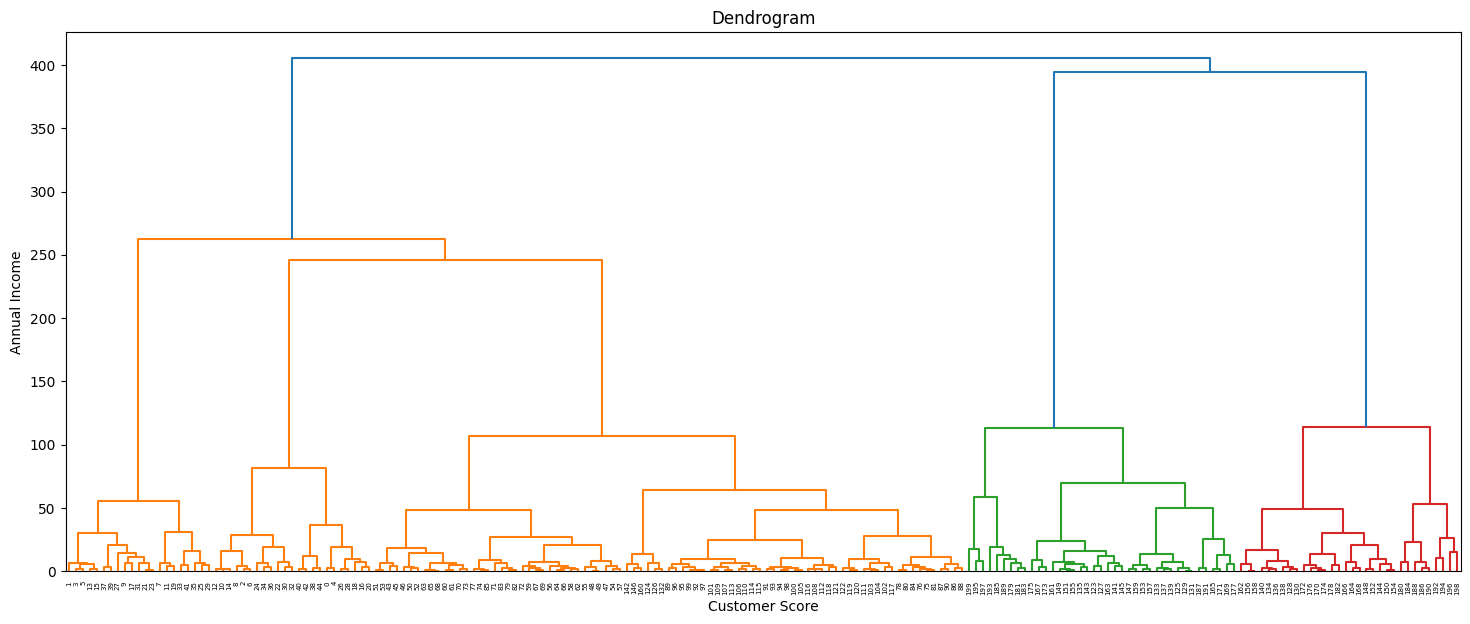

In [9]:
plt.figure(figsize=(18, 7))
dendogram = sch.dendrogram(sch.linkage(x, method='ward'))
# Plot the hierarchical clustering as a dendrogram
plt.title('Dendrogram')
plt.xlabel('Customer Score')
plt.ylabel('Annual Income')
plt.show()

#### Modeling
- Modeling dataset for hierarchical clustering using AgglomerativeClustering

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
hc = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
# Recursively merges pair of clusters of sample data; uses linkage distance

# hc = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
# affinity is deprecated, renamed to metric


#### Training & Prediction

In [12]:
y_hc = hc.fit_predict(x)
y_hc[:5]

array([4, 3, 4, 3, 4], dtype=int64)

In [13]:
pd.Series(y_hc).nunique()
# count of clusters

5

#### Visualize the cluster

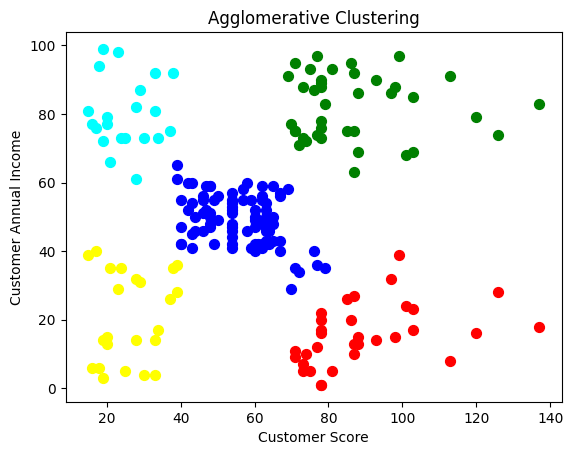

In [14]:
plt.scatter(x[y_hc==0, 0], x[y_hc==0, 1], s=50, c='red')
plt.scatter(x[y_hc==1, 0], x[y_hc==1, 1], s=50, c='blue')
plt.scatter(x[y_hc==2, 0], x[y_hc==2, 1], s=50, c='green')
plt.scatter(x[y_hc==3, 0], x[y_hc==3, 1], s=50, c='cyan')
plt.scatter(x[y_hc==4, 0], x[y_hc==4, 1], s=50, c='yellow')
# plt.scatter(x[y_hc==5, 0], x[y_hc==5, 1], s=50, c='brown')
plt.title('Agglomerative Clustering')
plt.xlabel('Customer Score')
plt.ylabel('Customer Annual Income')
plt.show()

## Partitional Algorithms
- construct various partitions and evaluate them by some criterion
    - K-Means Algorithm
    - DB scan Algorithm

### K-Means Algorithm
- unsupervised, iterative, clustering (Partitional) algorithm which groups unlabeled dataset into clusters which have similar properites
- method of grouping ```n``` observations in to ```k``` clusters
- uses vector quantization,  and assigns each data point to earest mean/centroid
- sensitive to outliers, need to identify and handle outliers before applying K-Means clustering
- Goal
    -  to minimize the sum of squared distances between the data points and their corresponding cluster centroids resulting in clusters that are internally homogeneous and distinct from each other
    - to optimize the centroids by repetitive re-clustering until convergence, resulting in optimal clustering solution
- centroid based algorithm where each cluster is associated with its centroid
- ```k```
    - represents the number of clusters we want to classify the items into
    - value of ```k``` needs to be pre-determined
- ```means```
    - refers to the averaging of the data , i.e. finding the centroid
- ```centroid```
    - imaginary or real location representing the center of the cluster
- It has two tasks
    - determines the best value of ```k``` center points or centroids by an iterative process
    - assigns each data point to its closest k-center/centroid , and the data points near to a particular centroid creates a cluster

#### Properties of Clustering
1. Property I
    - all the data points in a cluster should be similar to each other
2. Property I
    - data points from different clusters should be as different as possible
- Hence, data points from different clusters should be as different from each other as possible to have more meaningful clusters

#### Evaluation Metrics for clustering
1. Inertia
    - tells us how far the points within a cluster are
    - Value of Inertia should be as low as possible
    - calculates the sum of distances of all points within a cluster from the centroid of that cluster
    - to calculate distance,
        - use ```Euclidean Distance``` as long as most features are ```Numerical```
        - use ```Manhattan Distance```, in case most of the features are ```Categorical```
    - covers only Property I of Clustering, but does not cover Property II
    
    - But, we can't say that lower inertia value means better clustering
2. Dunn Index
    - ratio of minimum of inter-cluster distance  and maximum of intra-cluster distances
    - ```Dunn Index``` = ```min(Inter-Cluster Distance) / max(Intra-Cluster Distance)```
    - more the value of Dunn index, better the clusters will be
    - to maximize Dunn index
        - inter-cluster distance should be maximum, means clusters should be as far as possible
        - intra-cluster distance should be minimum, means data points with a cluster should be closer
    - covers both properties of clustering
    - makes sure data points are closer to each other (Property I) as well as data points are different from each other
    - takes in account distances
        - between centroid and data points(intra cluster distance)
        - between two clusters (inter-cluster distance)
3. Silhouette Score
    - Silhouette Score and plot are used to evaluate the quality of a clustering solution produced by the K-Means Algorithm
    - measures the similarity of each point to its own cluster as compared to other clusters
    - higher silhouette score indicates well separated clusters, and each data point has more similarity within its cluster
    - silhouette score of
        - ```zero``` means overlapping
        - ```negative``` means poor clustering

#### Algorithm for K-Means
1. Choose the number of clusters ```k```
2. Select ```k``` random points from the data as centroids
3. Assign all points to the nearest cluster centroid
4. Recompute the centroids of newly formed clusters
5. Repeat Step 3 and Step 4
6. Stopping Criteria for k-Means CLustering
    - Centroids of newly formed clusters do not change
        - centroids are not changing even after multiple iterations, means that model is not learning any new pattern
    - Points remain in the same cluster
        - Points remain in the same cluster even after training model for multiple iterations
    - Maximum number of iterations is reached (```default max_iter = 300```)
        - process of assigning nearest cluster centroid and recomputing centroids of newly formed clusters will repeat for set number of iterations
    
    

#### Challanges with K-Means Algorithm
1. Size of clusters is different
    - clusters might be of different shapes
2. Densities of original points is different
    - if there is one cluster which is loosly packed / spread out (is less dense) and other clusters are closely packed / compact (are dense), then upon re-clustering, closely packed clusters are assigned into a single cluster , but loosly packed clusters are are assigned into different clusters
3. Larger the dataset, more the computation cost
#### Solution to Challanges
1. Use a higher number of clusters
    - increasing the number of clusters might lead to more meaningful clusters
    - ```K-Means++```
        - we can use K-Means++ algorithm to choose the initial values or the initial cluster centroids at initialization using sampling based on empirical probability distribution of points' contribution to the overall inertia
        - this technique speeds up cnvergence
        - it is implemented by ```Greedy K-Means++```
2. Determining the optimal number of clusters for k-Means clustering can be another challange
    - it heavily relies on the subjective interpretations and the underlying structure of data
    - ```Elbow Method```
        - method to find the optimal number of clusters
        - plots the sum of squared Euclideandistances between data points and their cluster center and chooses the number of clusters where the change in the sum of squared distances begin to level off
        - uses the concept of ```WCSS (Within Cluster Sum of Squares)```, which defines the total variations within a cluster
        - to measure the distance between data points and centroid, we can use euclidean distance or manhattan distance
3. Outliers can have a significant impact on the results
    - need to identify and handle outliers before applying K-Means clustering to ensure that the results are meaningful and not skewed by the presence of outliers
    - methods to Handle ```Outliers```
        - removing outliers
        - transforming outliers
        - using a robust variant of K-Means clustering that is less sensitive to the presence of outliers
4. As the size of datasets increases, computational cost of K-Means clustering can also increase
    - consider ```alternative algorithms``` while working with huge datasets

#### K-Means++
- in some cases, if initilization of clusters is is not appropriate, K-Means can result in arbitrarily bad clusters
- K-Means++ specifies a procedure to initialize the cluster centers before moving forward with the standard k-Means clustering algorithm
- we can use K-Means++ algorithm to choose the initial values or the initial cluster centroids at initialization using sampling based on empirical probability distribution of points' contribution to the overall inertia
- this technique speeds up cnvergence
- it is implemented by ```Greedy K-Means++```
- Steps to initialize centroids using K-Means++
   1. first cluster is chosen uniformly at random from the data points we want to cluster, which is similar to what we do in K-Means, but instead of randomly picking all the centroids, we just pick one centroid here
   2. compute the distance ```(D(x))``` of each point from the cluster center that has already been chosen
   3. choose the cluster center from the data points with the probability of ```x``` being proportional to ```(D(x))^2```
   4. repeat setp 2 and step 3 until ```k``` clusters have been chosen

#### import libs

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### import dataset

In [16]:
# from google.colab import files
# uploaded = files.upload()
# D14data1.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [17]:
dataset = pd.read_csv('D14data1.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#### input dataset

In [18]:
x = dataset.iloc[ : , [3, 4]].values
x[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

#### Elbow Method
- most popular way to find the optimal number of clusters
- uses the concept of ```WCSS (Within Cluster Sum of Squares)```, which defines the total variations within a cluster
- plots agraph called ```Elbow Curve```, where ```x-axis``` is ```number of clusters``` and ```y-axis``` is ```evaluation metric (inertia or Dunn Index)```
- to measure the distance between data points and centroid, we can use euclidean distance or manhattan distance
- elbow method follows following steps
    - executes K-Measns clustering on a given data set for different ```k``` values (ranges 1-10)
    - for each value of ```k```, calculate the ```WCSS``` value
    - plot a curve between ```WCSS``` value and the number of clusters ```k```
    - sharp point of bend or a point of plot that looks like elbow of arm is the best value of ```k``` for K-Means
- Maximum Possible number of clusters is the number of observations in the dataset

In [19]:
from sklearn.cluster import KMeans

c:\users\surya\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\surya\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\surya\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\users\surya\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\

Text(0, 0.5, 'wcss_list')

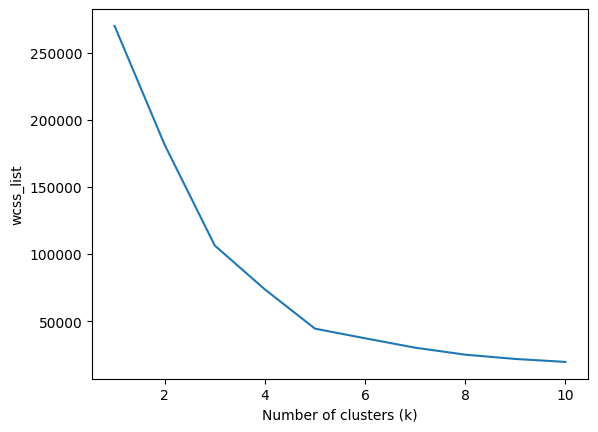

In [20]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    # K-Means clustering for finding WCSS
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.xlabel("Number of clusters (k)")
plt.ylabel("wcss_list")
# forms elbow curve, indicating it is K-Means algorithm
# optimal number of clusters is 5  as curve forms elbow at value 5 number of clusters

In [21]:
wcss
# count of clusters

[269981.28,
 181363.595959596,
 106348.37306211119,
 73679.78903948836,
 44448.45544793371,
 37265.86520484347,
 30259.65720728547,
 25050.83230754752,
 21862.092672182887,
 19657.783608703958]

#### Modeling

In [22]:
from sklearn.cluster import KMeans

In [23]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)
# K-Means clustering for actual clustering

#### Training & Prediction

In [24]:
y_kmeans = kmeans.fit_predict(x)
y_kmeans[:5]

c:\users\surya\appdata\local\programs\python\python39\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([3, 4, 3, 4, 3])

In [25]:
pd.Series(y_kmeans).nunique()
# count of clusters

5

#### Evaluation

##### Intertia

In [26]:
kmeans.inertia_

44448.45544793371

#### Visualize the cluster

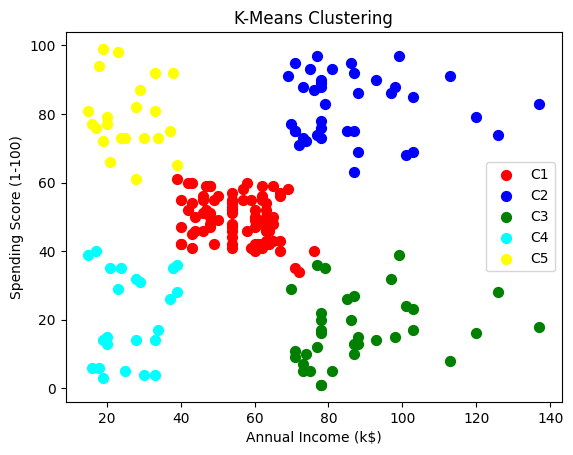

In [27]:
plt.scatter(x[y_kmeans==0, 0], x[y_kmeans==0, 1], s=50, c='red', label='C1')
plt.scatter(x[y_kmeans==1, 0], x[y_kmeans==1, 1], s=50, c='blue', label='C2')
plt.scatter(x[y_kmeans==2, 0], x[y_kmeans==2, 1], s=50, c='green', label='C3')
plt.scatter(x[y_kmeans==3, 0], x[y_kmeans==3, 1], s=50, c='cyan', label='C4')
plt.scatter(x[y_kmeans==4, 0], x[y_kmeans==4, 1], s=50, c='yellow', label='C5')
# plt.scatter(x[y_hc==5, 0], x[y_hc==5, 1], s=50, c='brown')
plt.title('K-Means Clustering')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### DB Scan Algorithm

- DB Scan : ```Density Based Spatial Clustering of Appications with Noise```
- proposed by Martin Ester et al in 1996
- It assumes that the cluster are dense regions in space separated by regions of lower density
- DB Scan is a density-based unsupervised clustering algorithm
- Clusters
    - no need to specify the number of clusters
    - clusters formed can be of any arbitrary shape
    - It can work well with datasets having noise or outliers
- Density
    - Density = number of points within a specified radius (```eps```)
    - density is the decision making criteria for creating clusters
    - locates regions with high density that are separated from one another by regions of low density
    - in density based clustering, clusters are dense regions in the data space , separated by regions of lower object density


- ```High-Density```
    - ```ϵ-Neighborhood``` of an object contains atleast ```MinPts``` of objects
- AnalyticsVidya | [How Does DBSCAN Clustering Work? | DBSCAN Clustering for ML](https://www.analyticsvidhya.com/blog/2020/09/how-dbscan-clustering-works/)


#### Hyperparameters of DB Scan
- Two HyperParameters required for DB Scan are
    1. Epsilon (```eps``` or ```ϵ```)
        - ```eps``` or ```ϵ``` defines the neighborhood around a data point
        - if the distance between two points is lower or equal to ```eps``` then they are neighbors
        - if ```eps``` is too small, then a large part of data will be considered outlier
        - if ```eps``` is too large, then the clusters will emerge and the majority of the data points will be the same clusters
        - one way to find the value of ```eps``` is based on k-distance graph
        - in general,small value of ```eps``` are preferred
    2. Minimum Points (```MinPts```)
        - mininmum number of neigbors within ```eps``` radius
        - larger the dataset, larger the value of ```MinPts``` must be chosen
        - the minimum value of ```MinPts``` must be chosen at least 3, larger is better
        - ```MinPts``` being 1 does not make any sense, as then every point on its own will already be a cluster
        - As a general rule, minimum ```MinPts``` can be derived from the number of Dimensions ```D``` in the dataset as ```MinPts >= D =1```

#### Types of Data points
- It can have three types of data points
    1. ```Core Point```
        - these are the points that are in the interior of a cluster
        - a point is a core point if it has more than specified number of points (```MinPts```) within ```eps```
        - Any two core points are close enough within a distance ```eps``` of another, are put in the same cluster
    2.  ```Border Point```
        - a border point has fewer ```MinPts``` with ```eps``` , but is in the neigborhood of a core point
        - Any border point that is close enough to a core point is put in the same cluster as the core point
    3. ```Noise Point``` or ```Outlier```
        - A point which is not  a core point or border point
        - Noise Points are discarded
- ```ϵ Neighborhood```
    - objects within a radius of ```ϵ``` from an object (epsilon-neighborhood)
- ```Core Objects```
    - ϵ-Neighborhood of an object contains atleast ```MinPts``` of objects

#### Reachability and Connectivity
- ```Reachability```
    - states if a data point can be accessed from another data points directly or indirectly
- ```Connectivity```
    - states that whether two data points belong to the same cluster or not
-  Two points ```X``` & ```Y``` can be referred in DB Scan as
    - ```Directly Density-Reachable```
        - Directly Density-Reachable is ```not-symmetrical```
        - point ```X``` is directly reachable from point ```Y```  w.r.t. ```eps``` and ```MinPts``` if
            - ```X``` belongs to the neighborhood of ```Y```, i.e. ```dist(X, Y)<=ϵ```
            - ```Y``` is a core point
        - here, ```X``` is directly density-reachable from ```Y```, but vice-versa is not valid
    - ```Density-Reachable```
        - Density-Reachable is ```not-symmetrical```
        - a point ```X``` is density-reachable from point ```Y``` w.r.t. ```eps``` and ```MinPts``` if
            - there is a chain of points ```p1, p2, p3, ..., pn``` and ```p1```=```X``` and ```pn```=```Y```, such that ```pi+1``` is directly density-reachable from ```pi```
        - Here, ```X``` is density-reachable from ```Y```, but the inverse of this is not valid
    - ```Density Connected```
        - not good enough to describe clusters
        - Density-Connectivity is ```symmetric```
        -  a point ```X``` is density-connected from point ```Y``` w.r.t. ```eps``` and ```MinPts```, if
            - there exists a point ```O``` such that both ```X``` & ```Y``` are density reachable from ```O``` w.r.t. ```eps``` and ```MinPts```
        - a pair of points ```X``` and ```Y``` are density connected, if they are commonly density-reachable from a point ```O```

#### import libs

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### import dataset

In [29]:
# from google.colab import files
# uploaded = files.upload()
# D14data1.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [30]:
dataset = pd.read_csv('D14data1.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [31]:
dataset.shape

(200, 5)

In [32]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [44]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


#### input dataset

In [45]:
x = dataset.iloc[ : , [3, 4]].values
x[:5]

array([[15, 39],
       [15, 81],
       [16,  6],
       [16, 77],
       [17, 40]], dtype=int64)

#### Preprocessing

##### Feature scaling
- avoid feature scaling because it makes it very dense, so all data points go under single cluster

In [46]:
# from sklearn.preprocessing import StandardScaler

In [47]:
# sc = StandardScaler()

In [48]:
# x = sc.fit_transform(x)
# x[:5]

### DB scan (eps=3)

#### Modeling (eps=3)

In [49]:
from sklearn.cluster import DBSCAN

In [50]:
dbscan = DBSCAN(eps=3, min_samples=4, metric='euclidean')
cls = dbscan.fit(x)

In [51]:
la = cls.labels_
la[:5]

array([-1, -1, -1, -1, -1], dtype=int64)

In [53]:
pd.Series(la).unique()
# unique values for labels

array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8], dtype=int64)

#### Training & Prediction (eps=3)

In [54]:
y_pred_dbscan = dbscan.fit_predict(x)
y_pred_dbscan[:5]

array([-1, -1, -1, -1, -1], dtype=int64)

In [56]:
pd.Series(y_pred_dbscan).nunique()
# count of clusters

10

#### visualization (eps=3)

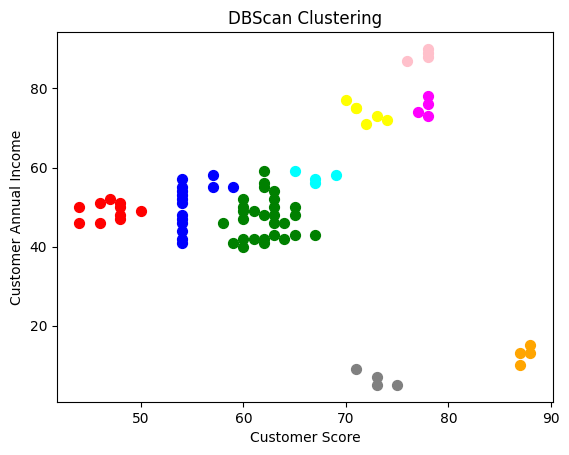

In [57]:
plt.scatter(x[y_pred_dbscan==0, 0], x[y_pred_dbscan==0, 1], s=50, c='red', label='C1')
plt.scatter(x[y_pred_dbscan==1, 0], x[y_pred_dbscan==1, 1], s=50, c='blue', label='C2')
plt.scatter(x[y_pred_dbscan==2, 0], x[y_pred_dbscan==2, 1], s=50, c='green', label='C3')
plt.scatter(x[y_pred_dbscan==3, 0], x[y_pred_dbscan==3, 1], s=50, c='cyan', label='C4')
plt.scatter(x[y_pred_dbscan==4, 0], x[y_pred_dbscan==4, 1], s=50, c='yellow', label='C5')
plt.scatter(x[y_pred_dbscan==5, 0], x[y_pred_dbscan==5, 1], s=50, c='gray', label='C6')
plt.scatter(x[y_pred_dbscan==6, 0], x[y_pred_dbscan==6, 1], s=50, c='pink', label='C7')
plt.scatter(x[y_pred_dbscan==7, 0], x[y_pred_dbscan==7, 1], s=50, c='magenta', label='C8')
plt.scatter(x[y_pred_dbscan==8, 0], x[y_pred_dbscan==8, 1], s=50, c='orange', label='C9')
plt.scatter(x[y_pred_dbscan==9, 0], x[y_pred_dbscan==9, 1], s=50, c='brown', label='C10')
# plt.scatter(x[y_hc==5, 0], x[y_hc==5, 1], s=50, c='brown')
plt.title('DBScan Clustering')
plt.xlabel('Customer Score')
plt.ylabel('Customer Annual Income')

plt.show()

### DB scan (eps=5)

#### Modeling (eps=5)

In [58]:
from sklearn.cluster import DBSCAN

In [59]:
dbscan = DBSCAN(eps=5, min_samples=4, metric='euclidean')
cls = dbscan.fit(x)

In [60]:
la = cls.labels_
la[:5]

array([-1,  0, -1,  0, -1], dtype=int64)

In [61]:
pd.Series(la).unique()
# unique values for labels

array([-1,  0,  1,  4,  2,  3,  5,  6], dtype=int64)

#### Training & Prediction (eps=5)

In [62]:
y_pred_dbscan = dbscan.fit_predict(x)
y_pred_dbscan[:5]

array([-1,  0, -1,  0, -1], dtype=int64)

In [63]:
pd.Series(y_pred_dbscan).nunique()
# as eps increases from 3 to 5, number of clusters decreased from 10 to 8

8

#### visualization (eps=5)

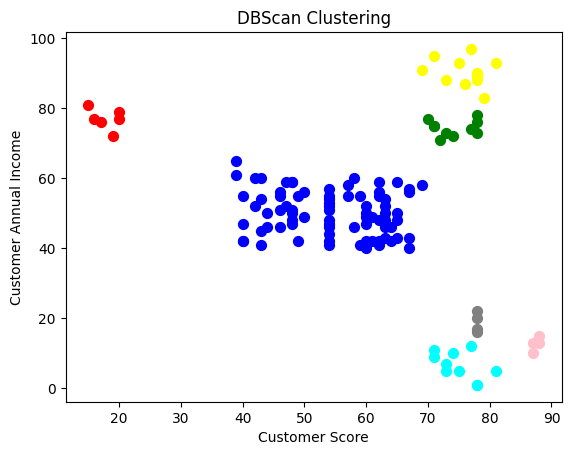

In [64]:
plt.scatter(x[y_pred_dbscan==0, 0], x[y_pred_dbscan==0, 1], s=50, c='red', label='C1')
plt.scatter(x[y_pred_dbscan==1, 0], x[y_pred_dbscan==1, 1], s=50, c='blue', label='C2')
plt.scatter(x[y_pred_dbscan==2, 0], x[y_pred_dbscan==2, 1], s=50, c='green', label='C3')
plt.scatter(x[y_pred_dbscan==3, 0], x[y_pred_dbscan==3, 1], s=50, c='cyan', label='C4')
plt.scatter(x[y_pred_dbscan==4, 0], x[y_pred_dbscan==4, 1], s=50, c='yellow', label='C5')
plt.scatter(x[y_pred_dbscan==5, 0], x[y_pred_dbscan==5, 1], s=50, c='gray', label='C6')
plt.scatter(x[y_pred_dbscan==6, 0], x[y_pred_dbscan==6, 1], s=50, c='pink', label='C7')
plt.scatter(x[y_pred_dbscan==7, 0], x[y_pred_dbscan==7, 1], s=50, c='magenta', label='C8')
plt.scatter(x[y_pred_dbscan==8, 0], x[y_pred_dbscan==8, 1], s=50, c='orange', label='C9')
# plt.scatter(x[y_hc==5, 0], x[y_hc==5, 1], s=50, c='brown')
plt.title('DBScan Clustering')
plt.xlabel('Customer Score')
plt.ylabel('Customer Annual Income')
plt.show()

### DBscan Example 2

#### import libs

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### import dataset

In [4]:
# from google.colab import files
# uploaded = files.upload()
# D14data2.npy

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [95]:
# dataset = np.load('D14data2.npy')
# dataset[:5]

In [96]:
dataset = pd.DataFrame(np.load('D14data2.npy'), columns=['x', 'y'])
dataset.head()

,x,y
0,-0.121535,-0.228763
1,-0.220937,-0.252511
2,0.125904,-0.273143
3,-0.164537,-0.222244
4,-0.180824,-0.211075


#### visualize x & Y

<Axes: xlabel='x', ylabel='y'>

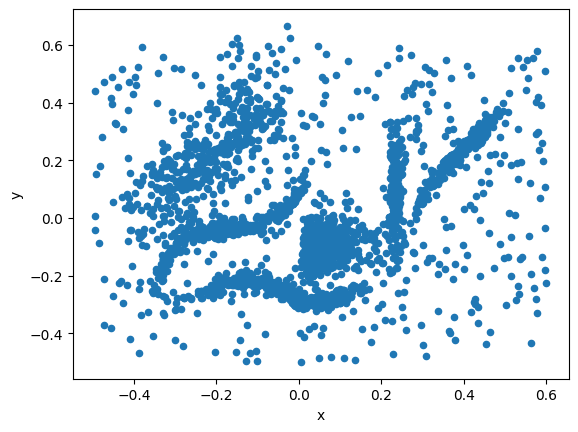

In [97]:
dataset.plot(kind='scatter', x='x', y='y')

#### DB Scan (eps=0.033)

In [98]:
from sklearn.cluster import DBSCAN

In [99]:
dbscan = DBSCAN(eps=0.033, min_samples=22, algorithm='brute', p=0.9)
# eps : epsilon
# min_samples : MinPts
# algorithm : algorithm to be used by the NearestNeighbors module to compute pointwise distances and find nearest neighbors
# p : power of the Minkowski metric to be used to calculate distance between points. If None, then p=2

##### Modeling (eps=0.03)

In [100]:
db = dbscan.fit(dataset)

In [101]:
la = cls.labels_
la[:5]

array([-1,  0, -1,  0, -1], dtype=int64)

In [102]:
pd.Series(la).unique()
# unique values for labels

array([-1,  0,  1,  4,  2,  3,  5,  6], dtype=int64)

In [103]:
len(dbscan.core_sample_indices_)
# count of indices of core samples

1364

##### Training & Prediction (eps=0.03)

In [104]:
y_pred_dbscan = db.fit_predict(dataset)
y_pred_dbscan[:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [105]:
pd.Series(y_pred_dbscan).nunique()
# count of clusters

7

##### visualization (eps=0.03)

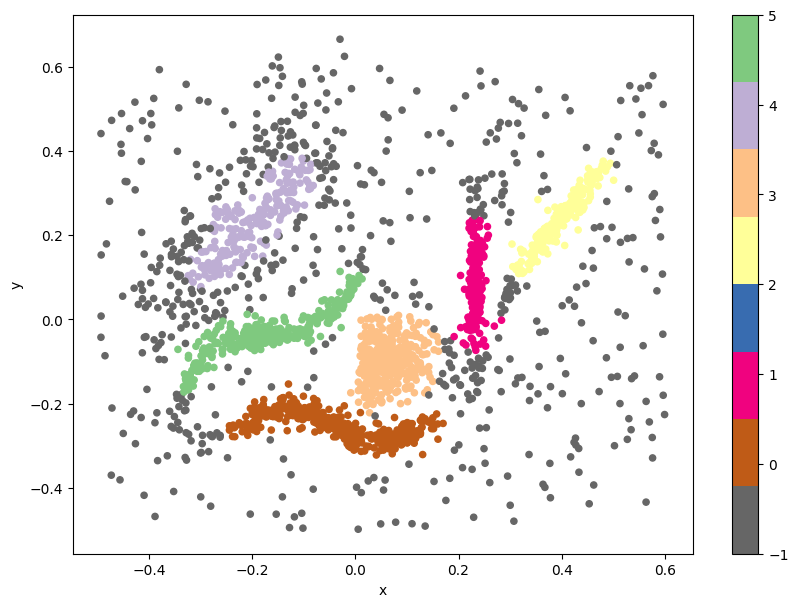

In [118]:
dataset.plot(kind='scatter', x='x', y='y', c=db.labels_, colorbar=True, cmap='Accent_r', figsize=(10,7))
plt.show()
# type(db)

# Market Basket Anlaysis
- popular example of frequent itemset mining is Market Basket Analysis
- leads to discovery of associations and correlations between items in huge transactional or relational datasets
- identifies customer buying habits by finding associations between items that customers place in their shopping baskets
- discovery of such associations is useful for retailers or marketers to develop strategies by gaining insights into which items are frequently bought together

# Working of Market Basket Analysis
1. Collect Transactional Data
    - Collect data on customer transactions, such as items purchased in each transaction, the time and date of the transaction, and any other relevant information
2. Preprocess data
    - Clean & preprocess the data, removing any irrelevant information, handling missing values, and converting the data into a suitable format for analysis
3. Identify Frequent item sets
    - Use ```Association Rules Mining``` algorithms such as ```Apriori``` or ```FP-Growth``` to identify frequent item sets, sets of items often appearing together in a transaction
4. Calculate Support & Confidence
    - Calculate the support & confidencefor each frequent itemset, which expresses the likelihood of one of them being purchased given the purchase of another item
5. Generate Association Rules
    - Generate association rules based on frequent itemsets and their corresponding support and confidence values
    - Association rules express the likelihood of one item being purchased given the purchase of another item
6. Interpret the results
    - Interpret the results of the market basket analysis, identifying which items are frequently purchased together, the strength of the association between the items, and any other relevant insights into customer behavior and preference
7. Take Action
    - Use the insights from the basket analysis to inform business decisions such as product recommendations, store layout optimization, and targeted marketing campaigns

# Types of Market Basket Analysis
1. Association Rule Mining
    - involves ```identifying frequent item sets``` and generating association rules that express the likelihood of one item being purchased with the puchase of another item
    - used to identify the relationships or association between items in a transactional dataset
2. Sequence Analysis
    - it focuses on ```order in which the items are purchased``` in a transaction
    - identifies frequent item sequences and generates sequential association rules describing the likelihood of one of the item sequence being followed by another
3. Cluster Analysis
    - involves ```grouping similar items or transactions``` into clusters or segments based on their attributes
    - helps to identify customer segments with similar purchasing behaviors, which can inform product recommendations and marketing strategies

# Applications of Market Basket Analysis
- Retail
    - Identify frequently purchased product combinations and create promotions or cross-selling strategies
- E-Commerce
    - Suggest compelementary products to customers and improve the customer experience
- Hospitality
    - Identify which menu items are often ordered together and create meal packages or menu recommendations
- Healthcare
    - Understand which medications are often prescribed together and identify patterns in patient behavior or treatment outcomes
- Banking / Finance
    - Identify which products or services are frequently used together by customers and create targeted marketing campaigns or bundle deals
- Telecommunication
    - Understand which products or services are often purchased together and create bundled service packages that increase revenue and improve the customer experience

# Advantages of Market Basket Analysis
- can be applied to data of customers from the Point-Of-Sale (PoS) Systems
- helps retaliers in following ways
    - increases customer engagement
    - boosts sales and increases RoI
    - improves customer experience
    - optimizes marketing strategies and campaigns
    - helps in demographic data analysis
    - identifies customer behavior and pattern

# Association Rule for Market Basket Analysis
- Let ```I``` = ```{I1, I2,..., Im}``` be the itemset, these itemsets are called ```Antecedents```
- Let ```D```, the data , be a set of database transactions where each transaction ```T``` is a non-empty itemset such that ```T ⊆ I```
- Each transaction is associated with an identifier called as ```TID``` (or ```Tid```)
- Let ```A``` be a set of items(itemsets)
- ```T``` is the transaction that is said to contain ```A``` if ```A ⊆ T```
- An Association Rule is an implication form ```A ⇒ B```, where ```A ⊆ I```, ```B ⊆ I```, and ```A ∩ B = φ (Empty Set)```
- Probability, ```P(A ∪ B)```
    - Rule ```A ⇒ B``` holds in the data set (transactions) ```D``` with supports, where ```s``` is the percentage of transactions in database ```D``` that contain ```A ∪ B``` (i.e. both ```A``` and ```B```)
- Conditional Probability, ```P(B|A)```
    - Rule ```A ⇒ B``` has confidence ```c``` in the transaction set ```D```, where ```c``` is the percentage of transactions in ```D``` containing ```A``` that also contains ```B```
- ```Support(A ⇒ B)``` = ```P(A ∪ B)```
- ```Confidence(A ⇒ B)``` = ```P(B|A)```
- Rules are called ```Strong```, that satisfy
    - a Minumum Support Threshold (called ```MinSup```)
    - a Minimum Confidence Threshold  (called ```MinConf```)
- ```Confidence(A ⇒ B)```   = ```P(B|A)```
- ```Confidence(A ⇒ B)```   = ```Support(A ∪ B)```/```Support(A)```
- ```Confidence(A ⇒ B)```   = ```support count(A ∪ B)```/```support count(A)```

# Association Rule Mining
- primarily used when you want to identify an association between different items in a set and the find frequent patterns in a transactional database or relational database
- can be viewed as a two-step process
    1. Find All Frequent Itemsets
        - each of these itemset will occur at least as frequently as a pre-established minimum support count ```MinSup```
    2. Generate Association Rules from Frequent Itemsets
        - these rules must satisfy Minimum Support ```MinSup``` and Minimum Confidence ```MinConf```

# Algorithms used in Market Basket Analysis
- one of the important object is ```to predict the probability of items that are being bought together by customers```
1. Apriori Algorithm
2. AIS
3. SETM Algorithm
4. FP-Growth

# Apriori Analysis
- algorithm is named ```Apriori``` because it uses prior knowledge of frequent itemset properties
- also called as ```Frequent Pattern Mining```
- considered accurate and overtop AIS algorithm and SETM algorithm
- an iterative search or level-wise search is used where k-frequent itemsets are used to find k+1 itemsets
- used to calculate the association rules between objects
- is an association learning that analyzes that poeple who bought product A also bought Product B
- operates on a database containing a huge number of ```transactions```, which corresponds to a basket of specific items
- need to scan the database multiple times to generate ```frequent itemset```, so increases computation cost
- ```frequent pattern```
    - a pattern (a set of items, subsequences, substructures, etc.) that occurs frequently in a dataset
    - an intrinsic and important property of datasets
    - essential for many data mining tasks
        - Association, correlation, and casuality analysis
        - Sequential, structural (e.g., sub-graph) pattern
        - Pattern analysis in spatioemporal, multimedia, time-series, and stream data
- frequent pattern analysis is first proposed by by Agrawal, Imielinski and Swami [AIS93] in the contect of ```frequent itemsets``` and ```association rule mining```
- ```Basket Data```
    - a very common type of data, which corresponds to a basket of specific items


# Components of Apriori Algorithm
- for ```Rule : X ⇒ Y```
- consider this example data to understand components, out of ```4000 transactions```
    - ```400``` contain ```biscuits```
    - ```600``` contain ```Chocolate```
    - and these ```600``` transactions contain ```200``` transactions which includes ```both biscuits and chocolates```
1. Support
    - ```Support``` = ```freq(X, Y)``` / ```N```
    - also called ```coverage```
    - refers to how much of database contains `if` part
    - refers to the default popularity of any product
    - is the quotient of the division of the number of transactions comprising that product by total number of transactions
    - ```Support(Biscuits)``` = ```(Transactions relating biscuits)``` / ```(Total Transactions)``` = 400/4000 = 10%
2. Confidence
    - ```Confidence``` = ```freq(X, Y)``` / ```freq(X)```
    - same as ```accuracy```
    - when `if` part is true, how often is `then` bit true
    - refers to the possibility that the customers bought both biscuits and chocolate together
    - divide the number of transactions the comprise both biscuits and chocolates by the total number of transactions to get the confidence
    - ```Confidence``` = ```(Transactions involving both biscuits and chocolate)``` / ```(Total transactions involving biscuits)``` = 200/400 = 50%
    - means that 50% of customers who bought biscuits bought chocolates also
3. Lift
    - ```Lift``` = ```Support``` / ```Supp(X)``` x ```Supp(Y)```
    - refers to the increase in ratio of the sale of chocolates when you sell biscuits
    - ```Lift``` = ```(Confidence (Biscuits-Chocolates) / Support(Biscuits))``` = 50/10 = 5
    - means that probability of people buying bith biscuits and chocolates together is 5 times more than that of purchasing the biscuits alone
    - if ```Lift = 1```
        - probability of antecedent and consequent is independent of each other
    - if ```Lift < 1```
        - it is unlikely that people buy two items together
        - one item is substitute for another, one item has negative effect on another
    - if ```Lift > 1```
        - determines the degree to which two itemsets are dependent to each other
    - ```Larger the lift```, more the chances of cross-selling, better the combination


# Advantages of Apriori Algorithm
- used to calculate huge itemsets
- simple to understand and apply

# Disadvantages of Apriori Algorithm
- an expensive method to find support since the calculation has to pass through the whole database
- needs huge number of candidate rules, so ite becomes computationally more expensive

## install libs

In [14]:
pip install apyori

## import libs

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## import dataset

In [16]:
# from google.colab import files
# uploaded = files.upload()
# D14data3.csv

import os
os.chdir(r'C:\Users\surya\Downloads\PG-DBDA-Mar23\Datasets')
os.getcwd()

'C:\\Users\\surya\\Downloads\\PG-DBDA-Mar23\\Datasets'

In [17]:
dataset = pd.read_csv('D14data3.csv', header=None)
dataset.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
dataset.shape

(7501, 20)

In [19]:
dataset.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,spinach,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


In [20]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7501 entries, 0 to 7500
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7501 non-null   object
 1   1       5747 non-null   object
 2   2       4389 non-null   object
 3   3       3345 non-null   object
 4   4       2529 non-null   object
 5   5       1864 non-null   object
 6   6       1369 non-null   object
 7   7       981 non-null    object
 8   8       654 non-null    object
 9   9       395 non-null    object
 10  10      256 non-null    object
 11  11      154 non-null    object
 12  12      87 non-null     object
 13  13      47 non-null     object
 14  14      25 non-null     object
 15  15      8 non-null      object
 16  16      4 non-null      object
 17  17      4 non-null      object
 18  18      3 non-null      object
 19  19      1 non-null      object
dtypes: object(20)
memory usage: 1.1+ MB


## generate transactions

In [22]:
# converting dataframe into list of lists
transaction = []
for i in range(1, 7501):
    transaction.append([str(dataset.values[i, j]) for j in range(0, 20)])

In [23]:
# transaction[:3] #debug

## Apriori Rules

In [24]:
from apyori import apriori

In [25]:
rules = apriori(transaction, min_support=0.0045, min_confidence=0.2, min_lift=3, min_length=2)
# defining MinSup, MinConf, MinLift and MinLength using transaction data to generate rules
rules

<generator object apriori at 0x000002DFABF07510>

In [26]:
# converting rules into list
results = list(rules)
results[:2]

[RelationRecord(items=frozenset({'chicken', 'light cream'}), support=0.004533333333333334, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.2905982905982906, lift=4.843304843304844)]),
 RelationRecord(items=frozenset({'mushroom cream sauce', 'escalope'}), support=0.005733333333333333, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.30069930069930073, lift=3.7903273197390845)])]

## Rules' Combinations

In [ ]:
for i in range(0, len(results)):
    print(results[i][0])
# printing combinations from rules

frozenset({'light cream', 'chicken'})
frozenset({'escalope', 'mushroom cream sauce'})
frozenset({'escalope', 'pasta'})
frozenset({'ground beef', 'herb & pepper'})
frozenset({'ground beef', 'tomato sauce'})
frozenset({'olive oil', 'whole wheat pasta'})
frozenset({'pasta', 'shrimp'})
frozenset({'light cream', 'chicken', 'nan'})
frozenset({'shrimp', 'chocolate', 'frozen vegetables'})
frozenset({'ground beef', 'spaghetti', 'cooking oil'})
frozenset({'escalope', 'nan', 'mushroom cream sauce'})
frozenset({'escalope', 'nan', 'pasta'})
frozenset({'ground beef', 'spaghetti', 'frozen vegetables'})
frozenset({'milk', 'olive oil', 'frozen vegetables'})
frozenset({'mineral water', 'shrimp', 'frozen vegetables'})
frozenset({'olive oil', 'spaghetti', 'frozen vegetables'})
frozenset({'shrimp', 'spaghetti', 'frozen vegetables'})
frozenset({'tomatoes', 'spaghetti', 'frozen vegetables'})
frozenset({'ground beef', 'spaghetti', 'grated cheese'})
frozenset({'ground beef', 'herb & pepper', 'mineral water'})


## Rules, Support, Confidence and Lift ratio

In [28]:
# printing Rules, Support, Confidence and Lift ratio
for item in results:
    # first  index of the inner list
    # contains base item and add item
    pair = item[0]
    items = [x for x in pair]
    print("Rule: "+items[0] + "->"+items[1])

    # second index of the inner list
    print("Support: "+str(item[1]))

    # third index of the list located at 0th of the third index of the inner list
    print("Confidence: "+str(item[2][0][2]))
    print("Lift: "+str(item[2][0][3]))
    print("------------------------------------------------------------------")

Rule: chicken->light cream
Support: 0.004533333333333334
Confidence: 0.2905982905982906
Lift: 4.843304843304844
------------------------------------------------------------------
Rule: mushroom cream sauce->escalope
Support: 0.005733333333333333
Confidence: 0.30069930069930073
Lift: 3.7903273197390845
------------------------------------------------------------------
Rule: pasta->escalope
Support: 0.005866666666666667
Confidence: 0.37288135593220345
Lift: 4.700185158809287
------------------------------------------------------------------
Rule: herb & pepper->ground beef
Support: 0.016
Confidence: 0.3234501347708895
Lift: 3.2915549671393096
------------------------------------------------------------------
Rule: tomato sauce->ground beef
Support: 0.005333333333333333
Confidence: 0.37735849056603776
Lift: 3.840147461662528
------------------------------------------------------------------
Rule: whole wheat pasta->olive oil
Support: 0.008
Confidence: 0.2714932126696833
Lift: 4.1302212880